### Install Library

In [415]:
# !pip3 install xgboost
# !pip3 install imblearn
# !pip3 install reshape

### Set Up Coding Environment

In [416]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc

### 1. Data Preprocessing

### 1.1 Load Dataset

In [417]:
Raw_df = pd.read_csv('Airbnb_dataset_cleaned1.csv')
Raw_df

,log_price,property_type,room_type,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
0,5.129899,Apartment,Entire home/apt,7,1.0,Real Bed,strict,True,NYC,t,f,100%,t,40.766115,-73.989040,6,93.0,10019,3.0,3.0
1,4.976734,Apartment,Entire home/apt,5,1.0,Real Bed,moderate,True,NYC,t,t,100%,t,40.808110,-73.943756,10,92.0,10027,1.0,3.0
2,4.744932,Apartment,Entire home/apt,2,1.0,Real Bed,moderate,True,DC,t,t,100%,t,38.925627,-77.034596,4,40.0,20009,0.0,1.0
3,4.442651,Apartment,Private room,2,1.0,Real Bed,strict,True,SF,t,t,100%,t,37.753164,-122.429526,3,100.0,94131,1.0,1.0
4,4.418841,Apartment,Entire home/apt,3,1.0,Real Bed,moderate,True,LA,t,f,100%,t,33.980454,-118.462821,15,97.0,90292,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31871,3.912023,Apartment,Private room,1,1.0,Real Bed,flexible,False,NYC,t,t,100%,f,40.826209,-73.951042,28,98.0,10031,1.0,1.0
31872,5.214936,House,Entire home/apt,6,2.0,Real Bed,strict,True,LA,t,f,100%,f,34.036418,-118.360197,16,96.0,90016,3.0,3.0
31873,4.276666,Apartment,Private room,2,1.0,Real Bed,flexible,True,LA,t,t,100%,t,34.062627,-118.345824,2,90.0,90036,1.0,1.0
31874,5.068904,Apartment,Entire home/apt,5,1.0,Real Bed,strict,True,NYC,t,t,93%,t,40.726027,-73.987512,150,82.0,10003.0,2.0,3.0


In [418]:
Raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31876 entries, 0 to 31875
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               31876 non-null  float64
 1   property_type           31876 non-null  object 
 2   room_type               31876 non-null  object 
 3   accommodates            31876 non-null  int64  
 4   bathrooms               31876 non-null  float64
 5   bed_type                31876 non-null  object 
 6   cancellation_policy     31876 non-null  object 
 7   cleaning_fee            31876 non-null  bool   
 8   city                    31876 non-null  object 
 9   host_has_profile_pic    31876 non-null  object 
 10  host_identity_verified  31876 non-null  object 
 11  host_response_rate      31876 non-null  object 
 12  instant_bookable        31876 non-null  object 
 13  latitude                31876 non-null  float64
 14  longitude               31876 non-null

### 1.2 Data Cleaning
### Check Missing Values or Duplicate values

In [419]:
# Check if there are null values in the dataset
print(Raw_df.isna().sum())

# Sum up the number of null values in the data
print("Total Null/NA values:", Raw_df.isnull().values.sum())

# Drop rows with any missing values and create a new DataFrame
df_cleaned = Raw_df.dropna()

log_price                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
instant_bookable          0
latitude                  0
longitude                 0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64
Total Null/NA values: 0


### Removing a Particular Column Exceeding the Threshold (0.7) and rerun the correlation matrix

In [420]:
corr = df_cleaned.corr().round(2)

# Identify columns with high correlations (greater than a threshold)
threshold = 0.7  
high_corr_columns = set()

for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            col_i = corr.columns[i]
            col_j = corr.columns[j]
            high_corr_columns.add(col_i)
            high_corr_columns.add(col_j)

print("Highly correlated columns:", high_corr_columns)

# Drop a specific column which is greater than a threshold (0.7) and unneccessary variables
column_to_drop = ['longitude', 'latitude','accommodates', 'zipcode','host_has_profile_pic']
df_cleaned_new = df_cleaned.drop(columns=column_to_drop, axis=1)
df_cleaned_new

Highly correlated columns: {'bedrooms', 'beds', 'latitude', 'longitude', 'accommodates'}


,log_price,property_type,room_type,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.129899,Apartment,Entire home/apt,1.0,Real Bed,strict,True,NYC,f,100%,t,6,93.0,3.0,3.0
1,4.976734,Apartment,Entire home/apt,1.0,Real Bed,moderate,True,NYC,t,100%,t,10,92.0,1.0,3.0
2,4.744932,Apartment,Entire home/apt,1.0,Real Bed,moderate,True,DC,t,100%,t,4,40.0,0.0,1.0
3,4.442651,Apartment,Private room,1.0,Real Bed,strict,True,SF,t,100%,t,3,100.0,1.0,1.0
4,4.418841,Apartment,Entire home/apt,1.0,Real Bed,moderate,True,LA,f,100%,t,15,97.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31871,3.912023,Apartment,Private room,1.0,Real Bed,flexible,False,NYC,t,100%,f,28,98.0,1.0,1.0
31872,5.214936,House,Entire home/apt,2.0,Real Bed,strict,True,LA,f,100%,f,16,96.0,3.0,3.0
31873,4.276666,Apartment,Private room,1.0,Real Bed,flexible,True,LA,t,100%,t,2,90.0,1.0,1.0
31874,5.068904,Apartment,Entire home/apt,1.0,Real Bed,strict,True,NYC,t,93%,t,150,82.0,2.0,3.0


### 1.3 Column Type Identification for Processed Dataset

In [421]:
# Change boolean columns to object (string) type
bool_columns = ['cleaning_fee']
df_cleaned[bool_columns] = df_cleaned_new[bool_columns].astype(str)


# Identify Categorical Columns
categorical_vars = df_cleaned.select_dtypes(include=['object', 'category']).columns
# Display the Categorical variables
categorical_info = pd.DataFrame({'Categorical Variable': categorical_vars})
categorical_info


,Categorical Variable
0,property_type
1,room_type
2,bed_type
3,cancellation_policy
4,cleaning_fee
5,city
6,host_has_profile_pic
7,host_identity_verified
8,host_response_rate
9,instant_bookable


In [422]:
# Identify Numerical Columns
numerical_vars = df_cleaned_new.select_dtypes(include=['int64', 'float64']).columns
# Display the numerical variables
numerical_info = pd.DataFrame({'Numerical Variable': numerical_vars})
numerical_info

,Numerical Variable
0,log_price
1,bathrooms
2,number_of_reviews
3,review_scores_rating
4,bedrooms
5,beds


### 1.4 Data Transformation

### Label Encoding for Categorical Variable

In [423]:
# Define the mapping dictionary
property_type_mapping = {'Apartment': 0, 'House': 1, 'Condominium': 2, 'Townhouse': 3}

# Define a custom function to apply the mapping
def map_property_type(property_type):
    return property_type_mapping.get(property_type, 4)

# Apply the custom function to the 'property_type' column
df_cleaned_new['property_type'] = df_cleaned_new['property_type'].apply(map_property_type)

# Display the updated DataFrame
print(df_cleaned_new['property_type'].unique())

[0 2 1 3 4]


In [424]:
df_cleaned_new['property_type'].unique()
category_counts = df_cleaned_new['property_type'].value_counts()
print(category_counts)

0    19995
1     7896
4     2008
2     1163
3      814
Name: property_type, dtype: int64


In [425]:
# Create a dictionary to map room names to numerical values
room_mapping = {'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2}

# Map the values using the defined dictionary and replace the rest with a default value (e.g., 999)
df_cleaned_new['room_type'] = df_cleaned_new['room_type'].replace(room_mapping)

# Display the updated DataFrame
print(df_cleaned_new['room_type'].unique())


[0 1 2]


In [426]:
category_counts = df_cleaned_new['room_type'].value_counts()
print(category_counts)

0    18281
1    12759
2      836
Name: room_type, dtype: int64


In [427]:
df_cleaned_new['bed_type'].unique()
# Define the mapping dictionary for 'bed_type'
bed_type_mapping = {'Real Bed': 0, 'Futon': 1, 'Pull-out Sofa': 2, 'Airbed': 3, 'Couch': 4}

# Map the values using the defined dictionary 
df_cleaned_new['bed_type'] = df_cleaned_new['bed_type'].replace(bed_type_mapping)

# Display the updated DataFrame
print(df_cleaned_new['bed_type'].unique())

[0 1 2 4 3]


In [428]:
category_counts = df_cleaned_new['bed_type'].value_counts()
print(category_counts)

0    31004
1      346
2      282
3      156
4       88
Name: bed_type, dtype: int64


In [429]:
# Create a dictionary to map city names to numerical values
cancellation_mapping = {'flexible': 0, 'moderate': 1, 'strict': 2, 'super_strict_30': 3,  'super_strict_60': 4}

# Map the values using the defined dictionary and replace the rest with a default value (e.g., 999)
df_cleaned_new['cancellation_policy'] = df_cleaned_new['cancellation_policy'].replace(cancellation_mapping)

# Display the updated DataFrame
print(df_cleaned_new['cancellation_policy'].unique())

[2 1 0 3 4]


In [430]:
category_counts = df_cleaned_new['cancellation_policy'].value_counts()
print(category_counts)

2    16423
1     9298
0     6096
3       53
4        6
Name: cancellation_policy, dtype: int64


In [431]:
df_cleaned_new['city'].unique()


array(['NYC', 'DC', 'SF', 'LA', 'Boston', 'Chicago'], dtype=object)

In [432]:
# Create a dictionary to map city names to numerical values
city_mapping = {'NYC': 0, 'LA': 1, 'SF': 2,  'DC': 3,  'Chicago': 4, 'Boston': 5}

# Map the values using the defined dictionary 
df_cleaned_new['city'] = df_cleaned_new['city'].replace(city_mapping)

# Display the updated DataFrame
print(df_cleaned_new['city'].unique())

[0 3 2 1 5 4]


In [433]:
category_counts = df_cleaned_new['city'].value_counts()
print(category_counts)

0    12900
1    10322
2     2681
3     2316
4     2027
5     1630
Name: city, dtype: int64


In [434]:
label_encoder = LabelEncoder()
df_cleaned_new['host_identity_verified'] = label_encoder.fit_transform(df_cleaned_new['host_identity_verified']) # True: 1; False: 0
df_cleaned_new['host_identity_verified'].unique()

array([0, 1])

In [435]:
# Replace "%" with an empty string in the specified column
df_cleaned_new['host_response_rate'] = df_cleaned_new['host_response_rate'].str.replace('%', '')
# Convert the object column to numeric
df_cleaned_new['host_response_rate'] = pd.to_numeric(df_cleaned_new['host_response_rate'], errors='coerce')
df_cleaned_new['instant_bookable'] = label_encoder.fit_transform(df_cleaned_new['instant_bookable']) # True: 1; False: 0
df_cleaned_new['instant_bookable'].unique()

df_cleaned_new['cleaning_fee'] = label_encoder.fit_transform(df_cleaned_new['cleaning_fee']) # True: 1; False: 0
df_cleaned_new['cleaning_fee'].unique()

array([1, 0])

In [436]:
#  List of categorical columns and numerical columns
categorical_columns = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city',
                        'host_identity_verified', 'host_response_rate',
                       'instant_bookable']
numerical_columns = ['bathrooms', 'number_of_reviews',
                     'review_scores_rating', 'bedrooms', 'beds']

# Select categorical data and numerical data
categorical_data = df_cleaned_new[categorical_columns]
numerical_data = df_cleaned_new[numerical_columns]

### Normalize the data

In [437]:
# List of categorical columns and numerical columns
categorical_columns = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city',
                        'host_identity_verified', 'host_response_rate',
                       'instant_bookable']
numerical_columns = ['bathrooms', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']

# Select categorical data and numerical data
categorical_data = df_cleaned_new[categorical_columns]
numerical_data = df_cleaned_new[numerical_columns]

In [438]:
# Initialize scalers
min_max_scaler = MinMaxScaler()
# Normalize the data
normalized_data = min_max_scaler.fit_transform(df_cleaned_new[numerical_columns])
# Create DataFrames for the transformed data
normalized_df = pd.DataFrame(normalized_data, columns=numerical_columns)
# Display the results
print("Normalized Data:")
normalized_df


Normalized Data:


,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds
0,0.125,0.008278,0.9125,0.3,0.1875
1,0.125,0.014901,0.9000,0.1,0.1875
2,0.125,0.004967,0.2500,0.0,0.0625
3,0.125,0.003311,1.0000,0.1,0.0625
4,0.125,0.023179,0.9625,0.1,0.0625
...,...,...,...,...,...
31871,0.125,0.044702,0.9750,0.1,0.0625
31872,0.250,0.024834,0.9500,0.3,0.1875
31873,0.125,0.001656,0.8750,0.1,0.0625
31874,0.125,0.246689,0.7750,0.2,0.1875


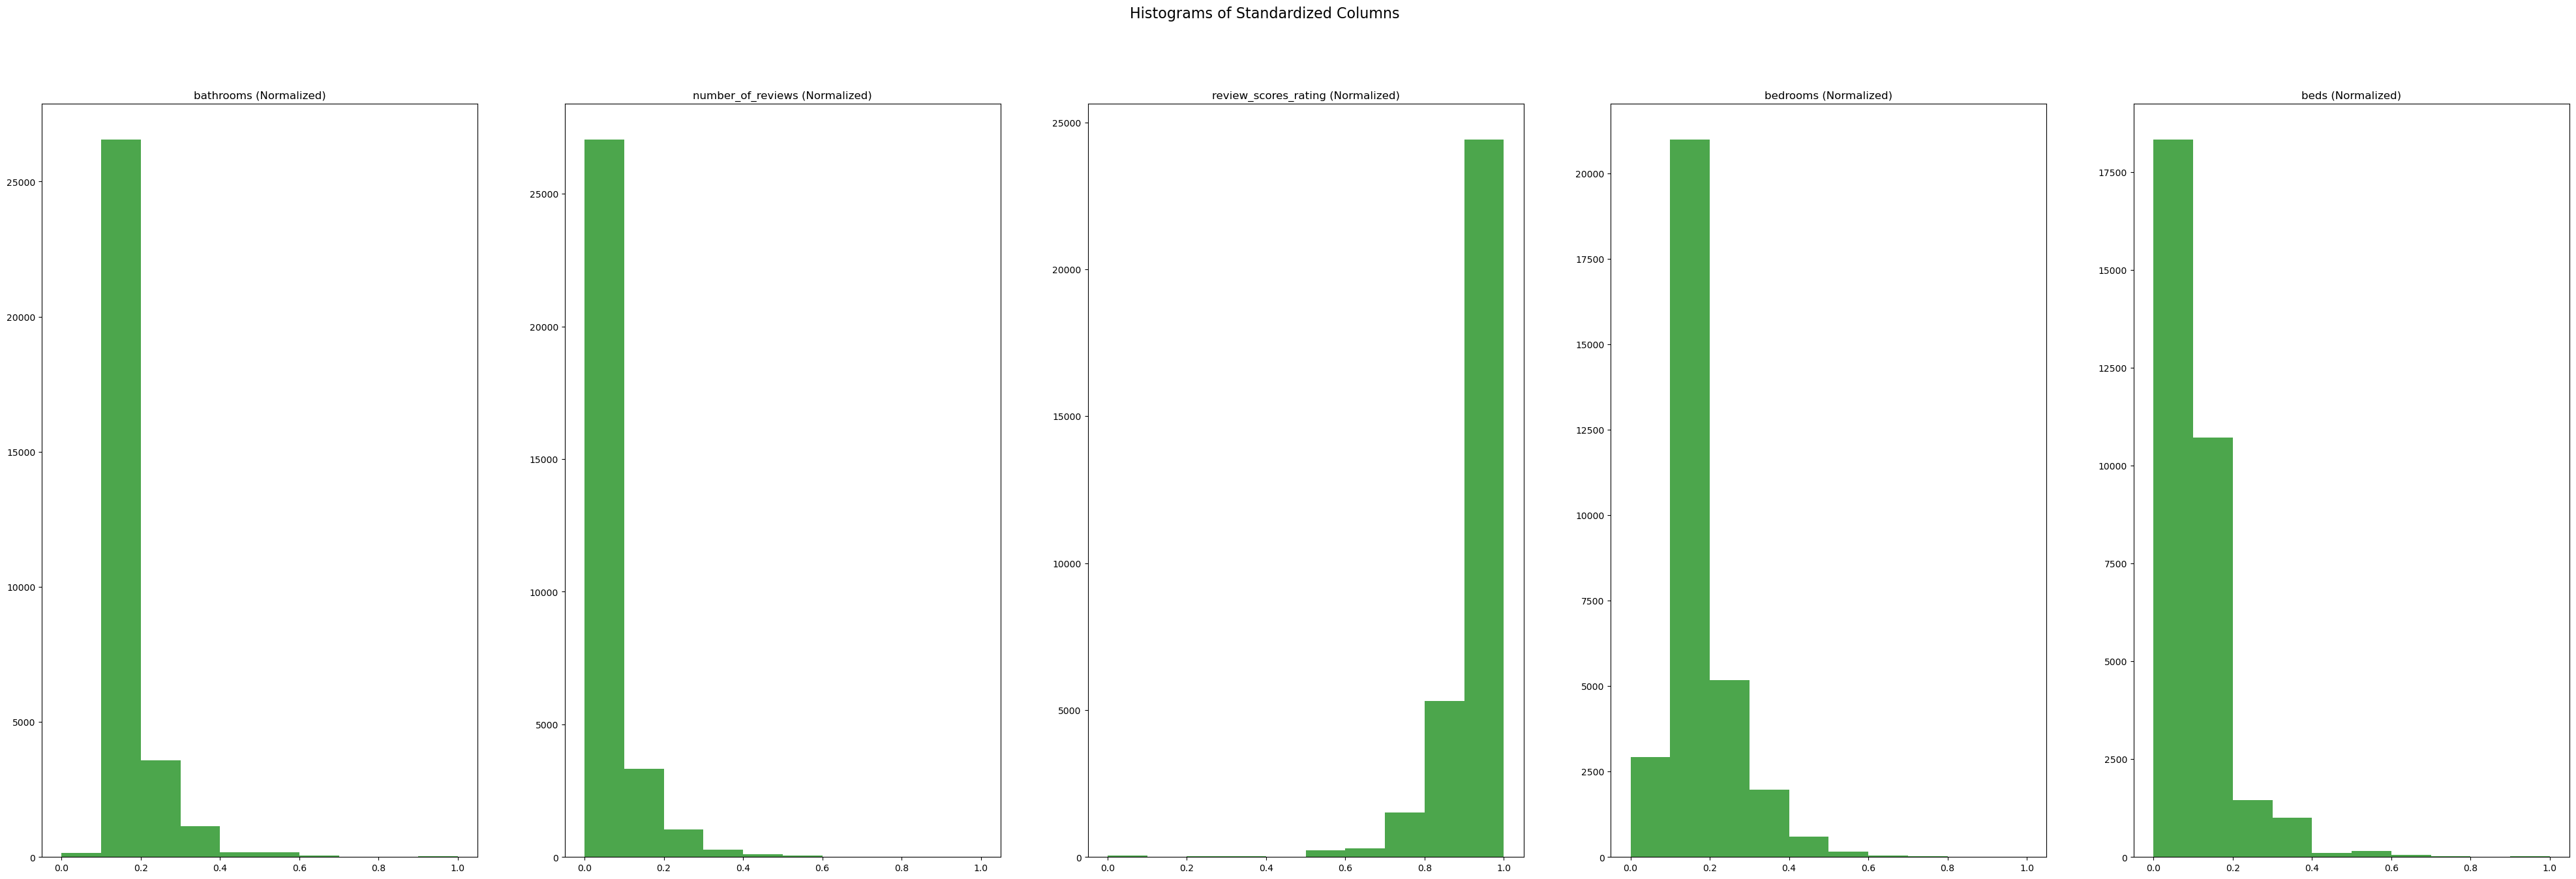

In [439]:
# Plot the histograms for each Normalized column
fig, axs = plt.subplots(1, len(numerical_columns), figsize=(50, 15))
fig.suptitle("Histograms of Standardized Columns", fontsize=16)

for i, column in enumerate(numerical_columns):
    axs[i].hist(normalized_df[column], bins=10, color='green', alpha=0.7)
    axs[i].set_title(column + " (Normalized)")

plt.show()

### Log multiplication of "Price"

 Regarding our target variable, "price," it's important to note that it has already a transformation from its original price to the natural logarithm (log of price) in the raw dataset we obtained from Kaggle. As a result, we keep it in its log-transformed state and there's no need for further normalization, as this transformation is essential for our analysis.


In [440]:
# Target variable
log_price = df_cleaned['log_price'] 
log_price

0        5.129899
1        4.976734
2        4.744932
3        4.442651
4        4.418841
           ...   
31871    3.912023
31872    5.214936
31873    4.276666
31874    5.068904
31875    4.234107
Name: log_price, Length: 31876, dtype: float64

### 4.4 Merging the data

In [441]:
# Target variable
log_price = df_cleaned_new['log_price']

# Merge the dataframes
normalized_data_merged = pd.concat([categorical_data, normalized_df,log_price], axis=1)
normalized_data_merged

,property_type,room_type,bed_type,cancellation_policy,city,host_identity_verified,host_response_rate,instant_bookable,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds,log_price
0,0,0,0,2,0,0,100,1,0.125,0.008278,0.9125,0.3,0.1875,5.129899
1,0,0,0,1,0,1,100,1,0.125,0.014901,0.9000,0.1,0.1875,4.976734
2,0,0,0,1,3,1,100,1,0.125,0.004967,0.2500,0.0,0.0625,4.744932
3,0,1,0,2,2,1,100,1,0.125,0.003311,1.0000,0.1,0.0625,4.442651
4,0,0,0,1,1,0,100,1,0.125,0.023179,0.9625,0.1,0.0625,4.418841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31871,0,1,0,0,0,1,100,0,0.125,0.044702,0.9750,0.1,0.0625,3.912023
31872,1,0,0,2,1,0,100,0,0.250,0.024834,0.9500,0.3,0.1875,5.214936
31873,0,1,0,0,1,1,100,1,0.125,0.001656,0.8750,0.1,0.0625,4.276666
31874,0,0,0,2,0,1,93,1,0.125,0.246689,0.7750,0.2,0.1875,5.068904


### Dataset Splitting at an 8:2 ratio with original dataset

In [442]:
# Define features (attributes) and labels
X = normalized_data_merged.drop(['log_price'], axis=1)
y = normalized_data_merged['log_price']

# labels = np.unique(y)
# print("Unique labels:", labels)

# Split the data into training and testing sets with 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (25500, 13)
X_test shape: (6376, 13)
y_train shape: (25500,)
y_test shape: (6376,)


### 4. Building Models

### XGBoost

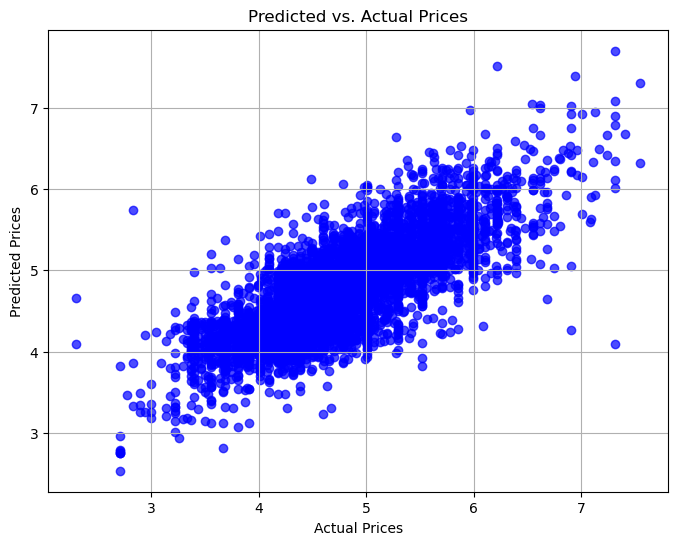

In [443]:

# Drop the 'city' and 'log price' columns from the dataset
X = normalized_data_merged.drop(['log_price'], axis=1)
y = normalized_data_merged['log_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost regressor model
XGBoost_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=500, learning_rate=0.3, max_depth=5)
XGBoost_model.fit(X_train, y_train)

# Predict on the test set
yhat_test = XGBoost_model.predict(X_test)

# Visualize predicted prices vs. actual prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, yhat_test, c='blue', alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs. Actual Prices')
plt.grid(True)
plt.show()


<Figure size 1000x800 with 0 Axes>

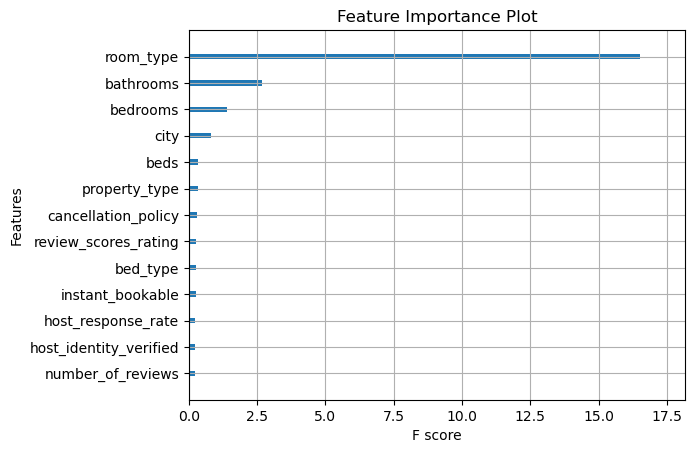

In [444]:
# Assuming 'model' is your trained XGBoost model
plt.figure(figsize=(10, 8))
xgb.plot_importance(XGBoost_model, importance_type='gain', show_values=False, max_num_features=19)
plt.title('Feature Importance Plot')
plt.show()

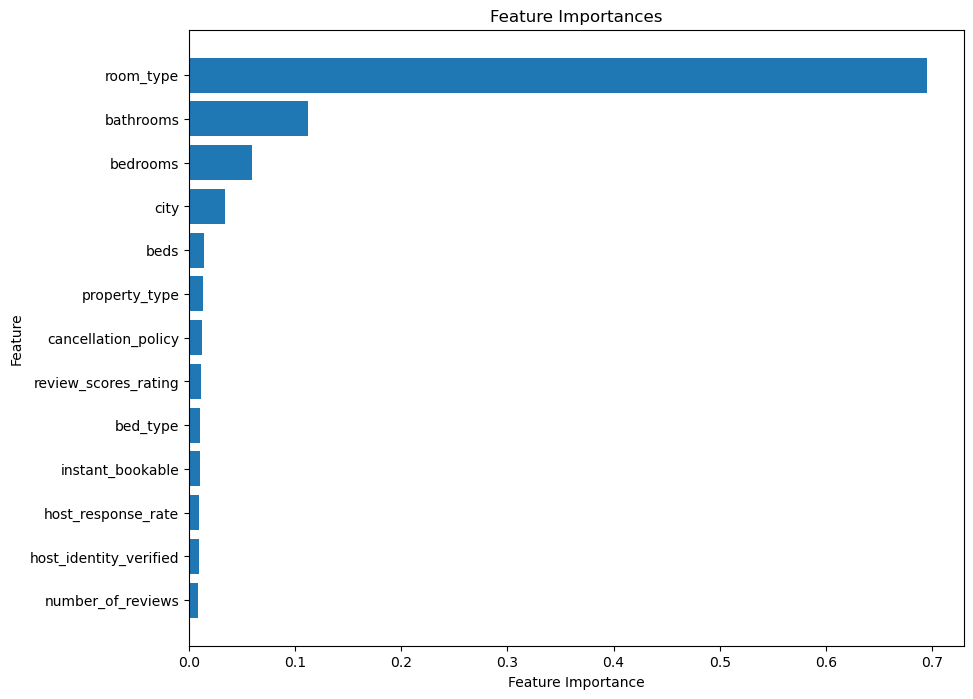

In [445]:
# Visualize feature importances
feature_importances = XGBoost_model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [446]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error: {mse}")

# Calculate Root Mean Squared Error
rmse = mean_squared_error(y_test, yhat_test, squared=False)
print(f"Root Mean Squared Error: {rmse}")

# Calculate R-squared
r2 = r2_score(y_test, yhat_test)
print(f"R-squared: {r2}")

Mean Squared Error: 0.17742309717426058
Root Mean Squared Error: 0.4212162119081607
R-squared: 0.6199305447777961


Mean Squared Error(train): 0.1723742638274122
Mean Squared Error(test): 0.18030066467327774
Mean Squared Error(train): 0.15179849801086326
Mean Squared Error(test): 0.16820874210442516
Mean Squared Error(train): 0.13884748793222149
Mean Squared Error(test): 0.1695133166021566
Mean Squared Error(train): 0.12256170798772255
Mean Squared Error(test): 0.17046258260909786
Mean Squared Error(train): 0.10197245781134394
Mean Squared Error(test): 0.17742309717426058


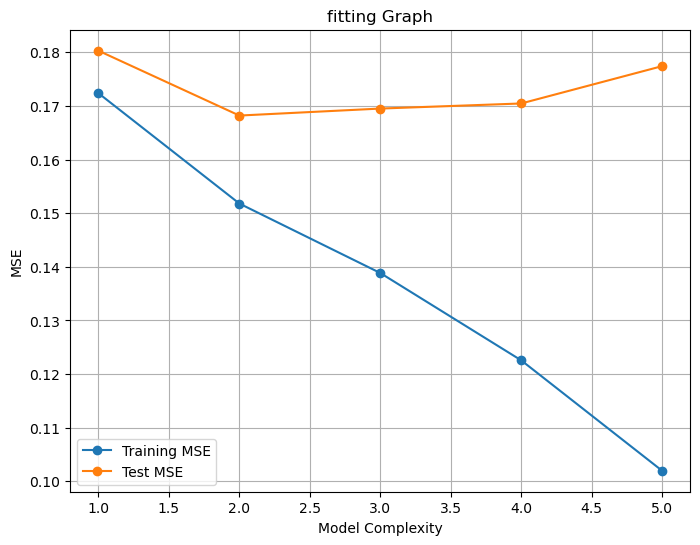

In [447]:
train_mses = []
test_mses = []
# List of model complexities (tree depth)
for depth in range(1,6):
  # Create and train the XGBoost regressor model
  model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=500, learning_rate=0.3, max_depth=depth)
  model.fit(X_train, y_train)
  
  # Predict on the train set
  yhat_train = model.predict(X_train)
  # Predict on the test set
  yhat_test = model.predict(X_test)
  
  # Calculate MSE(training)
  train_mse = mean_squared_error(y_train, yhat_train)
  print(f"Mean Squared Error(train): {train_mse}")
  # Calculate Mean Squared Error(test)
  test_mse = mean_squared_error(y_test, yhat_test)
  print(f"Mean Squared Error(test): {test_mse}")
  train_mses.append(train_mse)
  test_mses.append(test_mse)

  # fitting graph

# Plot the training and test MSE values
plt.figure(figsize=(8, 6))
plt.plot(range(1,6), train_mses, label='Training MSE', marker='o')
plt.plot(range(1,6), test_mses, label='Test MSE', marker='o')

# Label the axes and add a legend
plt.xlabel('Model Complexity')
plt.ylabel('MSE')
plt.title('fitting Graph')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [448]:
# train_scores = []
# val_scores = []

# for num_round in range(1, 501):
#     XGBoost_model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=num_round, learning_rate=0.3, max_depth=5)
#     XGBoost_model.fit(X_train_new, y_train)
    
#     # Predict on train and validation sets
#     yhat_train = model.predict(X_train_new)
#     yhat_val = model.predict(X_test_new)
    
#     # Calculate MSE for train and validation sets
#     train_mse = mean_squared_error(y_train, yhat_train)
#     val_mse = mean_squared_error(y_test, yhat_val)
    
#     train_scores.append(train_mse)
#     val_scores.append(val_mse)

# # Plot the train and validation scores
# plt.plot(range(1, 501), train_scores, label='Train MSE')
# plt.plot(range(1, 501), val_scores, label='Validation MSE')
# plt.xlabel('Number of Boosting Rounds')
# plt.ylabel('Mean Squared Error')
# plt.legend()
# plt.title('Train vs. Validation MSE')
# plt.show()


### LightGBM(LGBM)

### Random Forest

### k-NN Algorithm